# **SYRIATEL CUSTOMER CHURN**
#### Phase 3 Project

#### Name: CHARLES KAGWANJA
#### Name: OCTOBER 2023

## **BUSINESS UNDERSTANDING**

#### Introduction

Customer churn, also known as customer attrition, refers to the loss of customers. It is the percentage of customers that stopped using your company's product or service during a certain time frame. In our case SyriaTel, a telecommunication company, is encumbered with high customer churn. The company's management therefore desires to understand why they are losing customers and suggestions on what to act on thus increase customer retention rate.

#### Problem Statement

SyriaTel will maintain and increase profitability only if it is able to acquire and retain more customers who use the company's services. High customer churning, if unaddressed, will hurt the company's revenue. It is therefore paramount to draw a targeted strategy that can assist in retaining more customers. We aim to develop a binary classification model that predicts the likelihood of customers withdrawing. The model also endeavor to highlight factors leading to attrition and which should be addressed in priority.

#### Objectives
1. Develop an accurate model for predicting customer churn
2. Identify the factors that significantly affect customer churn
3. Provide valuable insights that could help reduce churn

#### Stakeholders
 * Management Team
 * Marketing Team

### **Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew, kurtosis


from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, mean_squared_error, roc_curve, roc_auc_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### **Data Understanding**

### **Importing Data**

In [2]:
# Importing the CSV file to python
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# viewing top 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Identifying column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

# **Exploratory Data Analysis**

# Univariate Analysis

### df Shape

In [4]:
# shape of the data-set
df.shape

(3333, 21)

The data has 3333 rowns and 21 columns

### Data types

In [5]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

### Summary of types in data

In [6]:
# data types in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The above demonstrate that our date is in four types; bool (1 column), float64 (8 columns), int64 (8 columns) and object (4 columns).
    - It also shows that there are no missing values as columns have equal  rows (3333)
    - We also notoce that "area code" is in type int64 while it chould be a string.

In [7]:
# A summary of our data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Changing Data Type  for "area code"

In [8]:
# Convert "area code" column to categorical data type
df["area code"] = df["area code"].astype("str")
print(df["area code"].dtype)

object


### Identifying numerical and categorical variables

Numerical data

In [9]:
# We visualize the numerical and categorical varialbles of our data-set
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


Categorical Data

In [10]:
#Identifying columns with Categorical Data
datas = df.select_dtypes(include=['object', 'bool'])

# Generating a list of columns with categorical Data
categorical_cols = [column for column in datas]
print(categorical_cols)

#Printing Column Data types
for col1 in categorical_cols:
    print(f"{col1} is in data type {type(col1)}")

['state', 'area code', 'phone number', 'international plan', 'voice mail plan', 'churn']
state is in data type <class 'str'>
area code is in data type <class 'str'>
phone number is in data type <class 'str'>
international plan is in data type <class 'str'>
voice mail plan is in data type <class 'str'>
churn is in data type <class 'str'>


Visualizing Categorical data

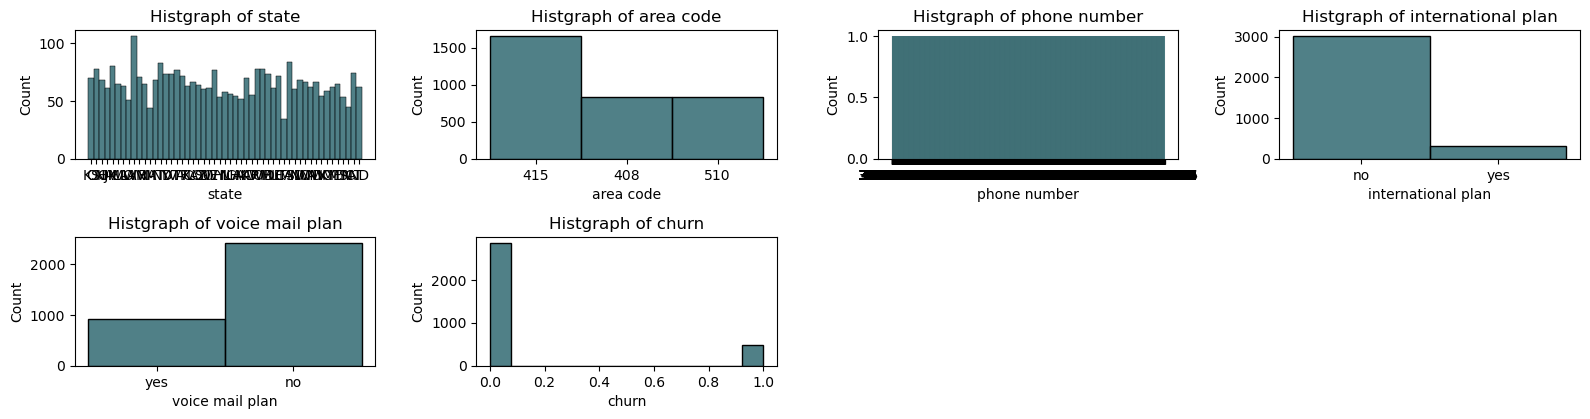

In [11]:
#Plotting the Histograph of the Categorical data
plt.figure(figsize=(16, 8))
for i, var in enumerate(categorical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(x=df[var], color="#16555f")
    plt.title(f'Histgraph of {var}')

plt.tight_layout()
plt.show()


### Interpretation: explain the above univariate analysis 
- The above provide an initial univariate analysis of the dataset, focusing on the data types of columns and visualizing categorical data. Here's a brief interpretation:

1. Data Types: The dataset was analyzed to identify four primary data types - bool, float64, int64, and object. This information is useful for understanding the nature of data in each column.

2. Missing Values: It was observed that there are no missing values in the dataset, as all columns have the same number of rows (3333). This ensures the data's completeness.

3. Data Type Correction: we also addressed the issue of the "area code" column, which was initially of type int64. It correctly converted the "area code" column to the categorical data type by using the `astype` function. This is important because area codes are typically treated as categorical information.

4. Identification of Numerical and Categorical Variables: we identified two groups of variables within the dataset - numerical and categorical. Numerical variables were selected based on the data types of int64 and float64, and categorical variables were selected based on object and bool data types. This separation is essential for subsequent analysis and visualization.

5. Visualization of Categorical Data: we provided visualizations for the categorical data in the dataset. It used a 4x4 subplot to display histograms for each categorical variable, making it easier to understand the distribution and characteristics of these variables.

In summary, we conducted preliminary data analysis, ensuring data integrity by addressing data type issues. 

## Data Preparation

In [12]:
print(df[df.duplicated()]**1)

print(df.isna().sum())

Empty DataFrame
Columns: [state, account length, area code, phone number, international plan, voice mail plan, number vmail messages, total day minutes, total day calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, total intl minutes, total intl calls, total intl charge, customer service calls, churn]
Index: []

[0 rows x 21 columns]
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn            

### Dealing Multi-colinearity
To deal with multicollinearity identify the most highly correlated variable and drop one from each of the pairs
    - We find find the variables with Multicolinearity of above o.7

Identifying the multicolinearity pairs

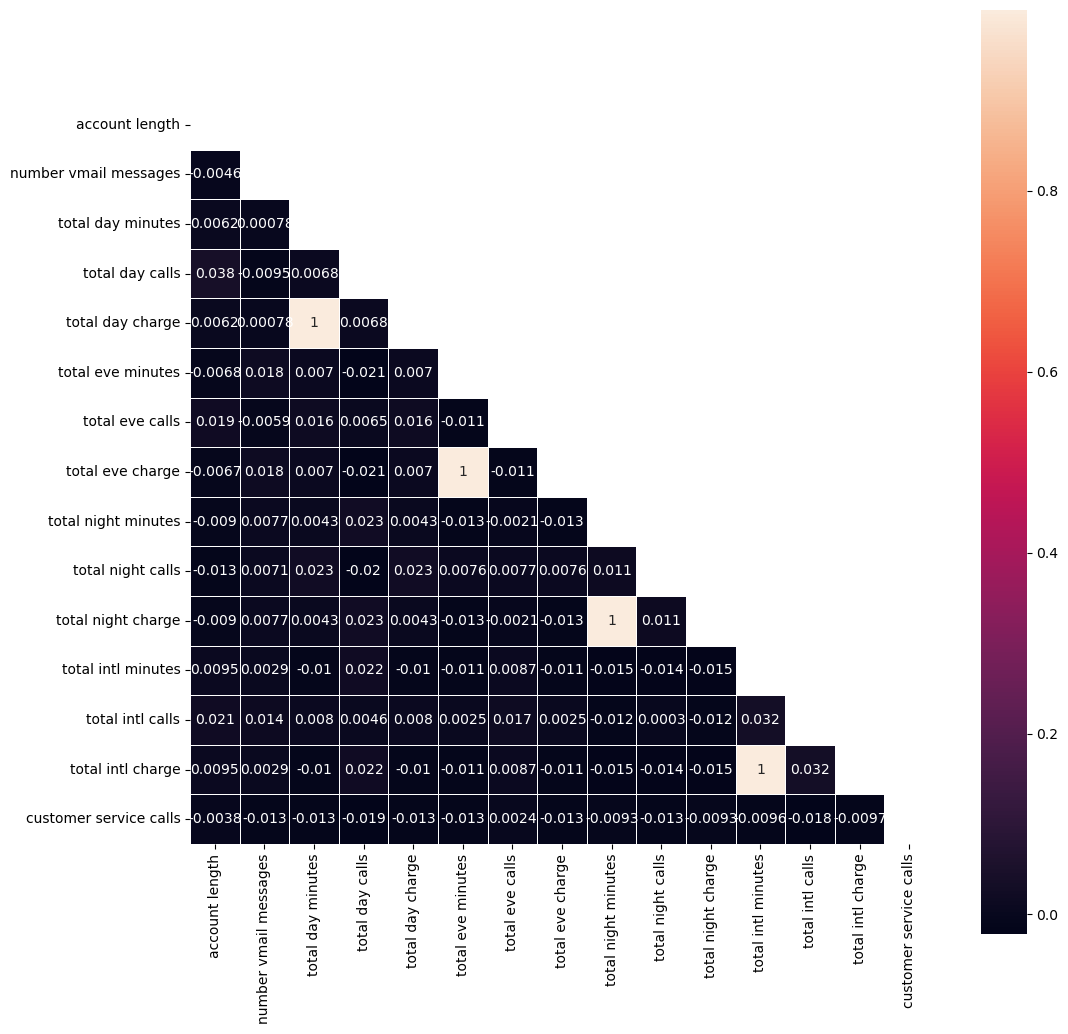

In [13]:
#Heatmap to show correlations
fig, ax = plt.subplots(figsize=(12,12))
multi = np.triu(np.ones_like(df[numerical_cols].corr(), dtype=bool))
sns.heatmap(df[numerical_cols].corr(), linewidths=0.5, mask=multi, square=True, ax=ax, annot=True);

From the above diagram, we note that Churn has weak correlation with most features.
    - Of these total day minutes, total day charge, and customer service calls have the 'highest' correlation with Churn of 0.21
    - total eve minutes, total eve charge have a correlation with Churn of 0.068


However, we also note that the below pairs have absolute correlations
- "total day minutes" vs "total day charge"
- "total eve minutes" vs "total eve charge"
- "total night minutes" vs "total night charge"
- "total intl minutes" vs "total intl charge"

### Dropping the multicolinearity pairs

In [14]:
df2 = df[numerical_cols].drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])

df2.columns


Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls'],
      dtype='object')

From the highly correlated pairs, we note that one of each, contains usage (depending on the time, day, evening, night, or international), and the other contains the respective charges. We drop the column for charges and keep the minutes, because they  represent the actual usage. The charges can be derived using the respective tariff rates.

So we drop "charge" columns.

#### Confirm there is no multicollinearity

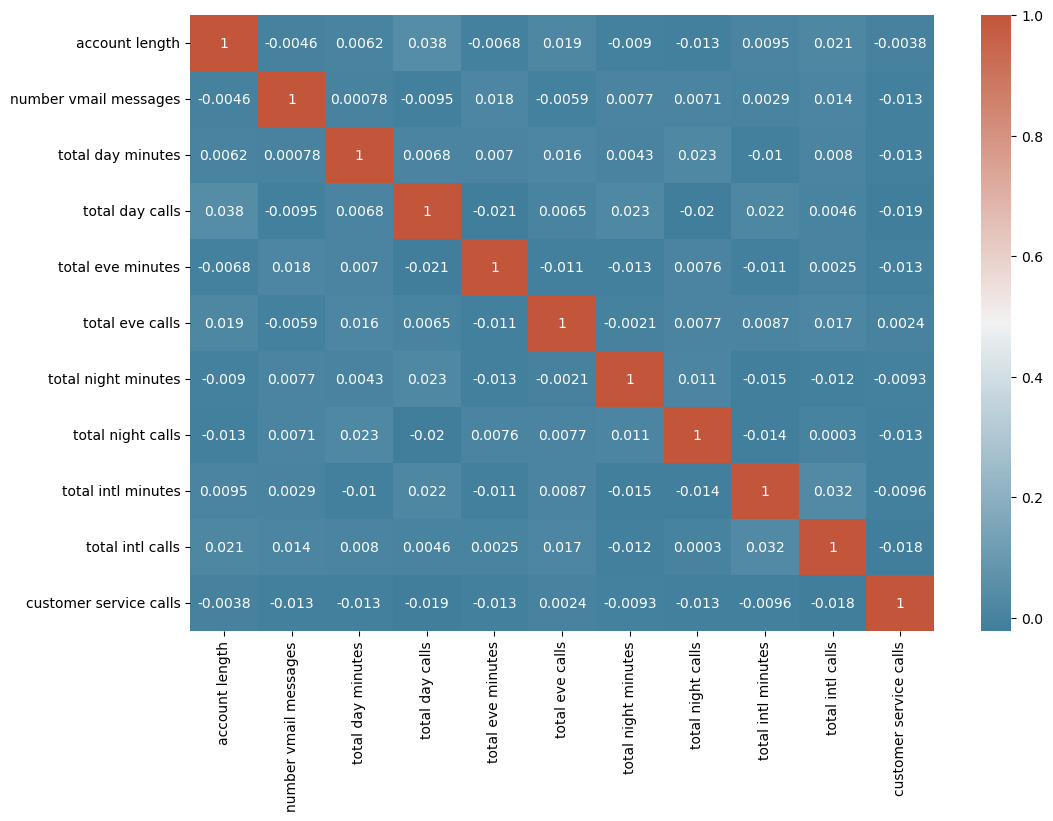

In [15]:
#Visualising Correlation
corr_matrix = df2.corr()

# Generate custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap)
plt.show()

###  Addressing multicollinearity in whole dataset
To address multicollinearity in the dataset, we dropped columns that had a high correlation with each other so as proceed with further analysis and potentially build a predictive model.

The columns being dropped are: 'total day charge', 'total eve charge', 'total night charge', and 'total intl charge'. as in the above code.
By dropping these columns, the code aims to reduce multicollinearity in the dataset, which can help improve the performance of models that rely on these features.


In [16]:
df = df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn'],
      dtype='object')

Split the data into features (X) and the target variable (y). Typically, the target variable is 'Churn', and the rest are features.
Encode categorical variables if there are any using techniques like one-hot encoding or label encoding.

### Converting Data to numeric format

In [17]:
# CATEGORICAL DATA
categorical_vars = list(df.select_dtypes(include=['object']).columns )
numerical_vars =  list(df.select_dtypes(include=['int64', 'float64']).columns )
categorical_vars, numerical_vars

(['state',
  'area code',
  'phone number',
  'international plan',
  'voice mail plan'],
 ['account length',
  'number vmail messages',
  'total day minutes',
  'total day calls',
  'total eve minutes',
  'total eve calls',
  'total night minutes',
  'total night calls',
  'total intl minutes',
  'total intl calls',
  'customer service calls'])

In [18]:
# USING one hot encoding for categorical data
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [19]:
df.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,False,False,False,False,False,False,False,False,False,True
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,False,False,False,False,False,False,False,False,False,True
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,False,False,False,False,False,False,False,False,False,False
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,False,False,False,False,False,False,False,False,True,False
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,False,False,False,False,False,False,False,False,True,False


In [20]:
df.columns

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls',
       ...
       'phone number_422-5874', 'phone number_422-6685',
       'phone number_422-6690', 'phone number_422-7728',
       'phone number_422-8268', 'phone number_422-8333',
       'phone number_422-8344', 'phone number_422-9964',
       'international plan_yes', 'voice mail plan_yes'],
      dtype='object', length=3398)

# Modelling

Defining 'target' and "predictors" Variiables

In [21]:
# target
y = df['churn']

# predictors
X = df.drop(columns=['churn'])

Checking class imbalance

In [22]:
# label/target value counts
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

### Splitting training data

In [23]:
# test size (25%)
test_size = 0.25
# random state seed
SEED = 600

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=SEED)

Let's check the new resampled target variable:

In [24]:
# data balanced and ready for modelling:
y_train.value_counts()

churn
False    2143
True      356
Name: count, dtype: int64

### Pick a model

### Baseline model (Dummy)
Before we actually perform any modeling, let's determine what metrics we would expect to get with a "dummy" model that always predicts the positive class.

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       707
        True       0.15      1.00      0.26       127

    accuracy                           0.15       834
   macro avg       0.08      0.50      0.13       834
weighted avg       0.02      0.15      0.04       834



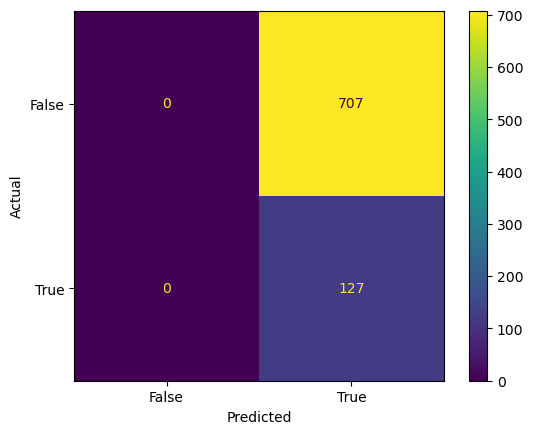

In [25]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(X_train, y_train)

cm_display = ConfusionMatrixDisplay.from_estimator(estimator=dummy_model, X=X_test, y=y_test,
                                                   display_labels=["False", "True"]);

# Set x and y axis labels
cm_display.ax_.set_xlabel('Predicted')
cm_display.ax_.set_ylabel('Actual')

# Make predictions
y_pred = dummy_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

interpret the above diagram

Dummy Model AUC: 0.5 



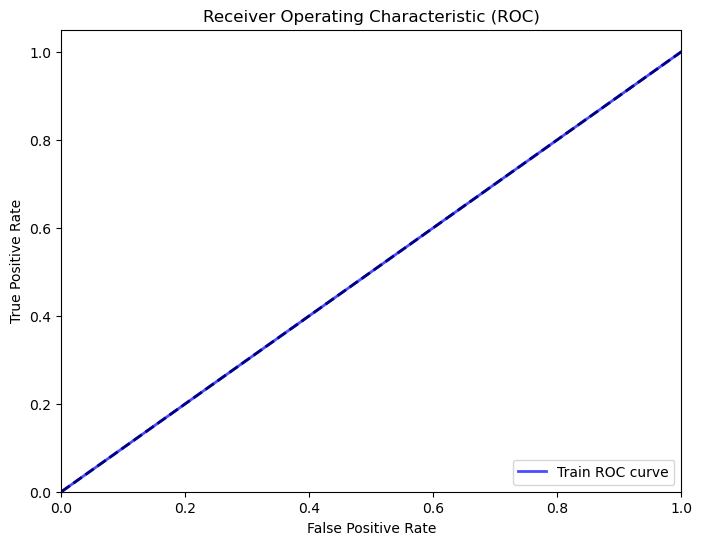

In [26]:
# dummy model metrics (ROC)
# Generate predicted probabilities for the positive class
y_scores = dummy_model.predict_proba(X_test)[:, 1]
# Calculate the ROC curve
dummy_fpr, dummy_tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC
auc = roc_auc_score(y_test, y_scores)

print(f'Dummy Model AUC: {auc} \n')

# plot the ROC for dummy model
lw = 2
plt.figure(figsize=(8, 6))
plt.plot(dummy_fpr, dummy_tpr, color='blue',
         lw=lw, label='Train ROC curve', alpha=.7)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### The interpretation 

1. **Confusion Matrix and Classification Report:**
   - The confusion matrix displays the number of true positives, true negatives, false positives, and false negatives.
   - The classification report provides additional metrics such as precision, recall, F1-score, and support for both the "False" and "True" classes.

2. **ROC Curve and AUC Score:**
   - The ROC curve is a graphical representation of the classifier's performance across different threshold settings. It helps visualize the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity).
   - The AUC (Area Under the Curve) score summarizes the overall performance of the classifier. A higher AUC indicates better model performance.

These results are crucial for evaluating the performance of the baseline dummy model, serving as a reference point for more complex models. In practice, you would aim to build models with higher AUC scores and better classification metrics than the dummy model.

You can continue the code by implementing and evaluating more sophisticated machine learning models to see if they outperform the dummy model in terms of classification and ROC metrics.

## Logistic Regression Model

In [27]:
logreg = LogisticRegression(random_state=SEED)

# fitting smote resampled data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(random_state=600)

### Logistic regression


Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.98      0.91       707
        True       0.42      0.08      0.13       127

    accuracy                           0.84       834
   macro avg       0.64      0.53      0.52       834
weighted avg       0.79      0.84      0.79       834

confusion matrix:
 [[693  14]
 [117  10]]


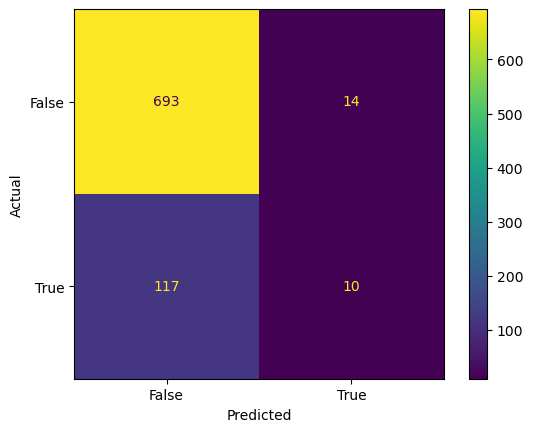

In [28]:
y_pred = logreg.predict(X_test)

# visualize the confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(estimator=logreg, X=X_test, y=y_test,
                                                   display_labels=["False", "True"]);

# Set x and y axis labels
cm_display.ax_.set_xlabel('Predicted')
cm_display.ax_.set_ylabel('Actual')

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))


Train AUC: 0.737853056987212
Test AUC: 0.7430197462940895


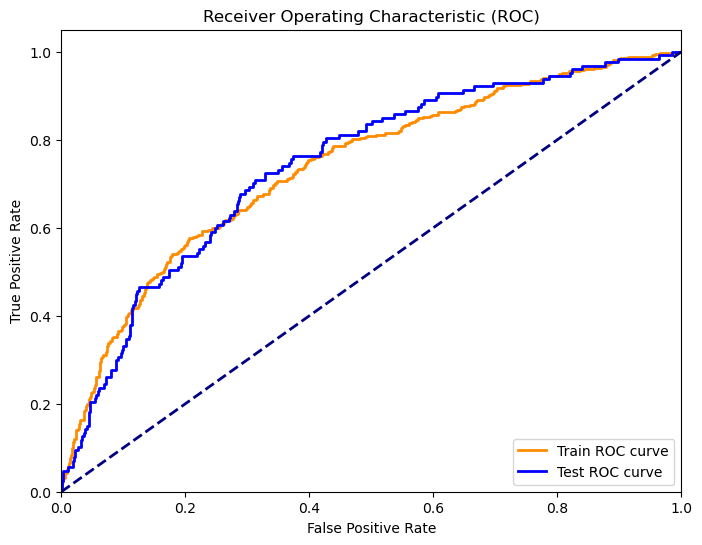

In [29]:
# Import necessary libraries if not already done
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# y train data score
y_train_score = model_log.decision_function(X_train)

# y test data score
y_test_score = model_log.decision_function(X_test)

# roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

# Calculate AUC for train and test sets
train_auc = roc_auc_score(y_train, y_train_score)
test_auc = roc_auc_score(y_test, y_test_score)

print('Train AUC: {}'.format(train_auc))
print('Test AUC: {}'.format(test_auc))

lw = 2

plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='blue', lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

The above essentially assesses the performance of a logistic regression model on a binary classification problem using the ROC curve, AUC, and confusion matrix. It provides a comprehensive evaluation of the model's predictive accuracy and can help in understanding its strengths and weaknesses.

### Accuracy

In [30]:
score = logreg.score(X_test, y_test)
train_score = accuracy_score(y_true=y_train,
                             y_pred=logreg.predict(X_train))
print("Model Accuracy on Test Data: {:.2f}%".format(score * 100))
print("Model Accuracy on Train Data: {:.2f}%".format(train_score * 100))

Model Accuracy on Test Data: 84.29%
Model Accuracy on Train Data: 85.75%


The printed output in the STDOUT of the focal cell indicates that the model achieved an accuracy of 84.29% on the test data and an accuracy of 85.75% on the training data.

## Decision Tree classifier

In [31]:
# create a base model
dt_classifier = DecisionTreeClassifier(random_state=SEED) # SMOTE resampled train data

# Fit the model to the training data
model_dt = dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = dt_classifier.predict(X_test)

array([[682,  25],
       [ 31,  96]], dtype=int64)

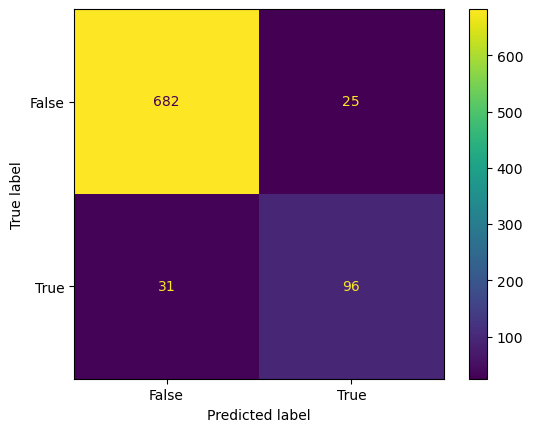

In [32]:
ConfusionMatrixDisplay.from_estimator(estimator=dt_classifier, X=X_test, y=y_test,
                                                   display_labels=["False", "True"]);
confusion_matrix(y_test, y_pred_test)

In [33]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96       707
        True       0.79      0.76      0.77       127

    accuracy                           0.93       834
   macro avg       0.87      0.86      0.87       834
weighted avg       0.93      0.93      0.93       834



roc_auc_test: 0.8602724164429941
roc_auc_train: 1.0


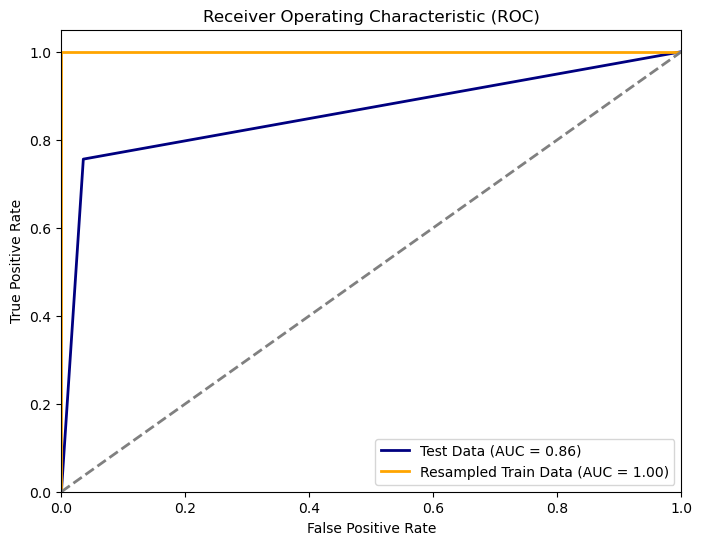

In [34]:
def plot_ROC(model, X_train, y_train, y_test):
    """
    Plots ROC curve for train and test data
    """
    # y_scores for train and test
    y_scores_test = model.predict_proba(X_test)[:, 1]
    y_scores_train = model.predict_proba(X_train)[:, 1]

    # roc curve for train (resampled) and test
    fpr_test_dt, tpr_test_dt, _ = roc_curve(y_test, y_scores_test)
    fpr_train_dt, tpr_train_dt, _ = roc_curve(y_train, y_scores_train)

    # roc auc for train (resampled) and test
    roc_auc_test = roc_auc_score(y_test, y_scores_test)
    roc_auc_train = roc_auc_score(y_train, y_scores_train)

    print("roc_auc_test:", roc_auc_test)
    print("roc_auc_train:", roc_auc_train)

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test_dt, tpr_test_dt, color='navy', lw=2,
             label='Test Data (AUC = {:.2f})'.format(roc_auc_test))
    plt.plot(fpr_train_dt, tpr_train_dt, color='orange', lw=2,
             label='Resampled Train Data (AUC = {:.2f})'.format(roc_auc_train))

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# ROC of decision tree with default hyperparameters (before tuning)
plot_ROC(model_dt, X_train, y_train, y_test)

h

In [35]:
# Create the DecisionTreeClassifier with the desired criterion
decision_tree = DecisionTreeClassifier(random_state=SEED)

# Create the pipeline
pipeline = Pipeline([('decision_tree', decision_tree)])

# Define the parameter grid for grid search
param_grid = {
    'decision_tree__criterion': ['gini', 'entropy'],  # Grid search between 'gini' and 'entropy'
    'decision_tree__max_depth': [1, 2, 5, 10],
    'decision_tree__min_samples_split': [1, 5, 10, 20]
}

# Create the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Let's fit the grid search to our data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decision_tree',
                                        DecisionTreeClassifier(random_state=600))]),
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [1, 2, 5, 10],
                         'decision_tree__min_samples_split': [1, 5, 10, 20]},
             scoring='accuracy')

In [36]:
# our decision tree model accuracy
score = grid_search.score(X_test, y_test)
train_score = accuracy_score(y_true=y_train,
                             y_pred=grid_search.predict(X_train))

print("Model Accuracy on Test Data: {:.2f}%".format(score * 100))
print("Model Accuracy on Train Data: {:.2f}%".format(train_score * 100))

Model Accuracy on Test Data: 94.00%
Model Accuracy on Train Data: 97.36%


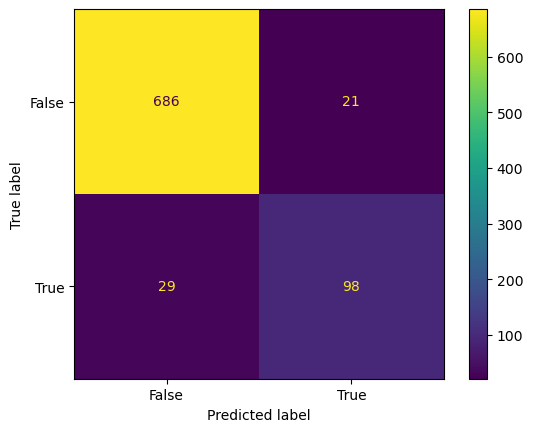

In [37]:
# tuned decisiontree model
ConfusionMatrixDisplay.from_estimator(estimator=grid_search, X=X_test, y=y_test,
                                      display_labels=["False", "True"]);

Tuned decisiontree model  accuracy

In [38]:
# tuned decision tree model accuracy
tuned_model_accuracy = grid_search.score(X_test, y_test)
tuned_model_train_accuracy = accuracy_score(y_true=y_train, y_pred=grid_search.predict(X_train))

print("Tuned Model Accuracy on Test Data: {:.2f}%".format(tuned_model_accuracy * 100))
print("Tuned Model Accuracy on Train Data: {:.2f}%".format(tuned_model_train_accuracy * 100))

Tuned Model Accuracy on Test Data: 94.00%
Tuned Model Accuracy on Train Data: 97.36%


### What factors are most influential in predicting churn

In [39]:

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Get the feature importances from the DecisionTreeClassifier
feature_importances = best_model.named_steps['decision_tree'].feature_importances_

# Create a DataFrame to associate features with their importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top influential features
top_features = importance_df.head(10)

# Print the top influential features
print("Top Influential Features:")
print(top_features)

Top Influential Features:
                     Feature  Importance
2          total day minutes    0.273375
4          total eve minutes    0.143110
10    customer service calls    0.119412
9           total intl calls    0.096499
3395  international plan_yes    0.073524
8         total intl minutes    0.071244
3396     voice mail plan_yes    0.064293
6        total night minutes    0.017710
1      number vmail messages    0.014688
57                  state_WA    0.011643



### Visualize the top influential features in ascending order

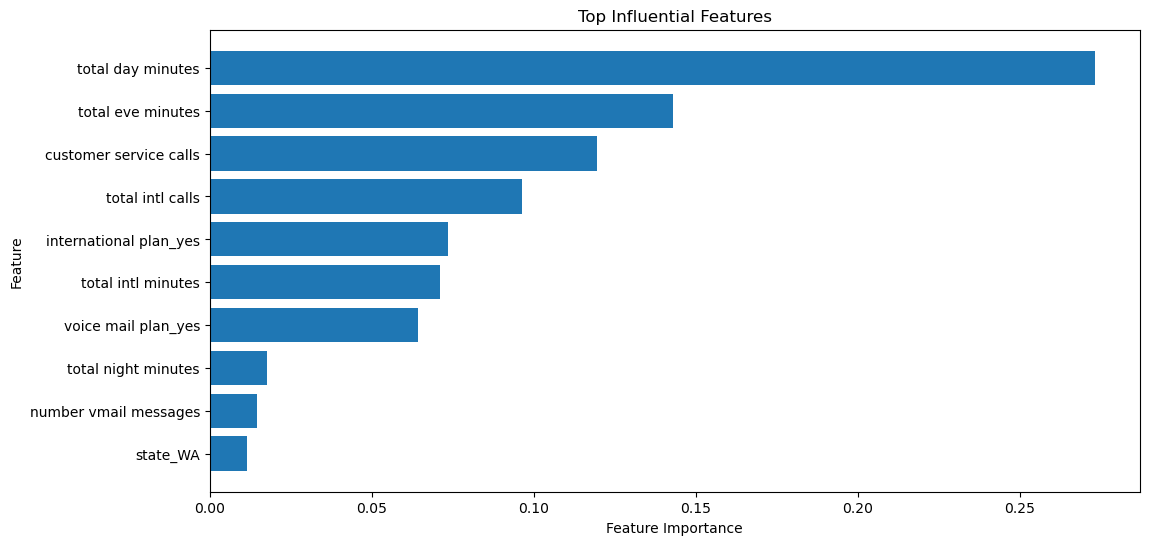

In [40]:
#Sorting in descending order for the graph
top_features = top_features.sort_values(by='Importance', ascending=True)

# Visualize the top influential features
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Influential Features')
plt.show()

provide a high level insights from  of the tuned decision tree model  suggestions how to improve it 

## Conclusions 

Summary
This project involved performing feature selection and identifying the top influential features in a machine learning model. We used a grid search to find the best estimator for a DecisionTreeClassifier and extracted feature importances. The top influential features were sorted as displayed.



# Business Recommendations

Summarized advice for handling the top influential features to reduce churn.

1. Based on top  three Features:
    - SyriaTel may consider offering plans with flexible day minutes to cater to different usage patterns. Provide data packages or discounts during peak hours.
    - SyriaTel may ntroduce evening-specific promotions and packages. Encourage customers to use evening minutes for longer calls or special activities like video calls.
    - SyriaTel may similarly focus on reducing the number of customer service calls. Improve self-service options, provide clear FAQs, and offer incentives for issue resolution through other channels.  

2. Focus on Retention Strategies:
    - Identify and target customers with the most influential features that indicate a higher risk of churning.
    - Implement retention strategies such as special offers, loyalty programs, or personalized recommendations to keep these customers engaged.

3. Customer Segmentation:
    - Segment your customer base based on the influential features. This can help tailor marketing efforts and communication to different customer groups.
    - For example, if the top feature is "contract duration," you can create specific marketing campaigns for customers with short-term contracts to encourage them to stay longer.
    

    
    
    
    

4. Feature Enhancement:
    - Improve the features with lower importance but still relevant to reduce churn. These features may have potential for improvement or further analysis.
    - Continuously monitor and update the list of influential features as customer preferences and behaviors change.

5. Monitor and Evaluate:
    - Implement the advised strategies and closely monitor the impact on churn rates.
    - Regularly update the analysis as the business landscape evolves to ensure that your strategies remain effective.

 